# Final Project - Gender Prediction

## 1. Explore dataset

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read datasets
codes = pd.read_csv('codes.csv', ';') 
types = pd.read_csv('types.csv', ';') 
train_set = pd.read_csv('train_set.csv', ';') 
test_set = pd.read_csv('test_set.csv', ';') 
tr = pd.read_csv('transactions.csv', ';')

In [3]:
tr.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [5]:
# check duplicates and drop them
tr.duplicated(keep = False).sum()
tr.drop_duplicates(keep = 'first', inplace = True)

In [6]:
round(tr['sum'].describe(), )

count      130010.0
mean       -18125.0
std        558501.0
min     -41500301.0
25%        -22452.0
50%         -5502.0
75%         -1123.0
max      67377473.0
Name: sum, dtype: float64

Here we can see that our mean value is **-18,129**, 75% percentile is **-1,123** and our max value is **67,377,473**.
So we can say that we have big outliers in positive side of sum column. Its like we have some customers who generates a lot of money. 

In [7]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [8]:
codes

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"
...,...,...
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"


In [9]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [10]:
types

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....
...,...,...
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...


In [11]:
# number of males and female are balanced.
train_set[train_set['target'] == 1].shape, train_set[train_set['target'] == 0].shape

((2660, 2), (3340, 2))

In [12]:
# useless clients, we dont need them in new merged dataset
test_set

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250
...,...
2651,13491189
2652,54047312
2653,68859452
2654,95721840


## 2. Explanatory data analysis. Exploring the features, visualizations

In [13]:
# new merged with 'codes' and 'types' dataset
df = tr.merge(codes, 'left', 'code').merge(types, 'left', 'type')
df.head()

,client_id,datetime,code,type,sum,code_description,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы


In [14]:
# We dropped useless clients which gender is unknown
# So now we have 6000 unique clients
df = df[df['client_id'].isin(train_set.client_id)]

In [15]:
# check number of transactions
# Only 1 client with 2777 transactions
# And others have transactions less than 500
df.groupby('client_id').count().sort_values(by='sum', ascending=False).head(20)

,datetime,code,type,sum,code_description,type_description
client_id,,,,,,
70780820,2777,2777,2777,2777,2777,2777
87252636,497,497,497,497,497,497
76043922,463,463,463,463,463,463
29041434,442,442,442,442,442,442
53854864,380,380,380,380,380,380
29894123,364,364,364,364,364,364
85861930,335,335,335,335,335,335
38691781,329,329,329,329,329,329
73534440,326,326,326,326,326,326


{'whiskers': [<matplotlib.lines.Line2D at 0x2d2defa7250>,
 'caps': [<matplotlib.lines.Line2D at 0x2d2defa7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d2def92eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d2defa7fd0>],
 'fliers': [],
 'means': []}

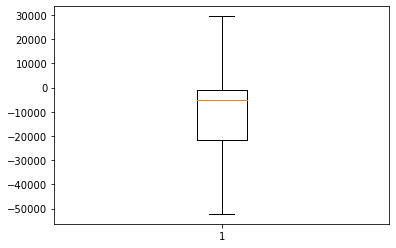

In [16]:
# Before we said about some extreme values of 'sum' column
# Now I made boxplot to see sum column without extreme values
fig, ax = plt.subplots()
ax.boxplot(df['sum'], showfliers=False)

In [17]:
# And i come to conclusion that nearly 14% of data is low value outliers and about 8% of data is high value outliers.
df[df['sum'] < -50000].shape[0] , df[df['sum'] > 30000].shape[0]

(12679, 7709)

Using boxplot we can see that **~14%** of data is low value outliers and **~8%** of data is high value outliers.

In [18]:
top_10 = df['code_description'].value_counts().head(10)
top_10 = top_10.rename(index={'Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов' : 'Различные продовольственные магазины'})

Text(0.5, 0, 'Count')

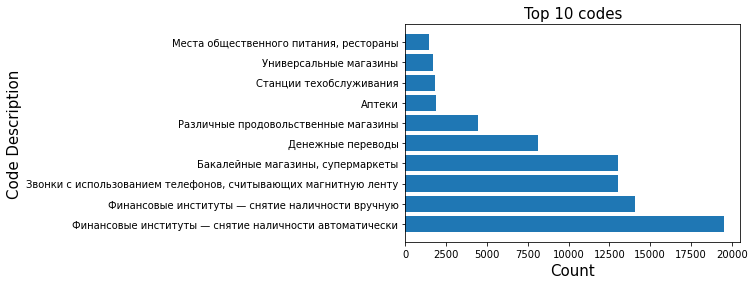

In [19]:
fig, ax = plt.subplots()

ax.barh(top_10.index, top_10)

plt.title('Top 10 codes', fontsize=15)
plt.ylabel('Code Description', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [20]:
top_10 = df['type_description'].value_counts().head(10)

Text(0.5, 0, 'Count')

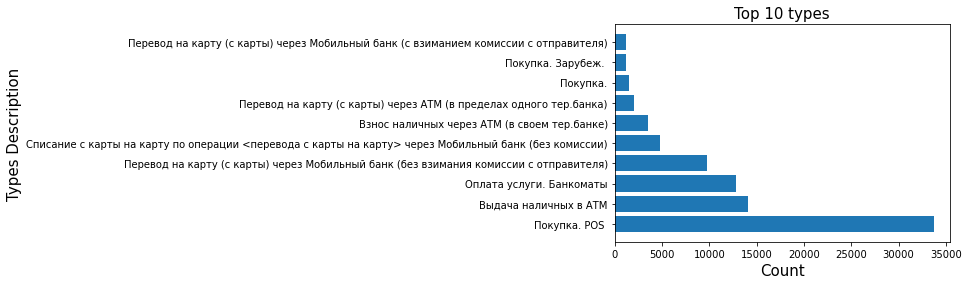

In [21]:
fig, ax = plt.subplots()

ax.barh(top_10.index, top_10)

plt.title('Top 10 types', fontsize=15)
plt.ylabel('Types Description', fontsize=15)
plt.xlabel('Count', fontsize=15)

## 3. Feature engineering

In [22]:
# Importing Label Encoder to encode 'code_description' and 'type_description'
from sklearn.preprocessing import LabelEncoder

In [23]:
# Apply target column
df = df.merge(train_set, how='inner')
df

,client_id,datetime,code,type,sum,code_description,type_description,target
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,0
1,96372458,270 06:16:18,6011,7010,224591.58,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),0
2,96372458,97 10:48:35,4829,2370,-11229.58,Денежные переводы,Списание с карты на карту по операции <перевод...,0
3,96372458,445 07:33:38,4829,2330,-417695.42,Денежные переводы,Списание с карты по операции “перевода с карты...,0
4,96372458,4 09:33:46,4814,1030,-2245.92,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,0
...,...,...,...,...,...,...,...,...
91802,82133712,424 13:23:10,6011,2010,-17967.33,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,1
91803,82133712,232 09:38:10,6536,6110,179673.26,Денежные переводы MasterCard MoneySend,Возврат покупки. POS,1
91804,12289409,108 11:13:33,6011,2010,-132509.03,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,0
91805,71829751,72 14:50:37,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,0


In [24]:
# Clean dataset to encode
df.dropna(inplace=True)
df.drop(df[df['type_description'].str.contains('н/д')].index, inplace = True)
df['type_description'] = df['type_description'].replace('<', '').replace('>', '')

In [25]:
le = LabelEncoder()
df_en = df.copy()

In [26]:
# Encoding
df_en['code_description'] = le.fit(df['code_description'])
df_en['code_description'] = le.transform(df['code_description'])
df_en['type_description'] = le.fit(df['type_description'])
df_en['type_description'] = le.transform(df['type_description'])

In [27]:
# Store encodeing results
code_desc = df_en['code_description']
type_desc = df_en['type_description']

In [28]:
#Merge all necessary columns into 1 dataframe
df_con = pd.concat([code_desc, type_desc, df['sum'], df['target']], axis=1)
df_con

,code_description,type_description,sum,target
0,159,12,-561478.94,0
1,159,6,224591.58,0
2,30,47,-11229.58,0
3,30,50,-417695.42,0
4,38,19,-2245.92,0
...,...,...,...,...
91802,159,12,-17967.33,1
91803,31,10,179673.26,1
91804,159,12,-132509.03,0
91805,159,12,-44918.32,0


## 4. Supervised Learning

In [29]:
# import packages
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report as report
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve, auc

In [30]:
# divide into independent and dependent variables
X = df_con.drop('target', axis = 1)
y = df_con['target']

In [31]:
# split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
# Build Decision Tree model and check results
clf = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.67      0.61     11609
           1       0.57      0.44      0.50     11318

    accuracy                           0.56     22927
   macro avg       0.56      0.56      0.55     22927
weighted avg       0.56      0.56      0.55     22927



In [33]:
# Use grid search hyperparameter tuning
max_features_range = np.arange(1, 6, 1)
max_depth_range = np.arange(2, 22, 2)
param_grid = dict(max_features=max_features_range, max_depth=max_depth_range)

grid = GridSearchCV(clf, param_grid)


In [34]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [35]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                         'max_features': array([1, 2, 3, 4, 5])})

In [36]:
# take best parameters and ROC/AUC score
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
print('Decision Tree Roc/Auc:', roc_auc_score(y, clf.predict_proba(X)[:, 1]))

The best parameters are {'max_depth': 14, 'max_features': 2} with a score of 0.56
Decision Tree Roc/Auc: 0.7917365511309244


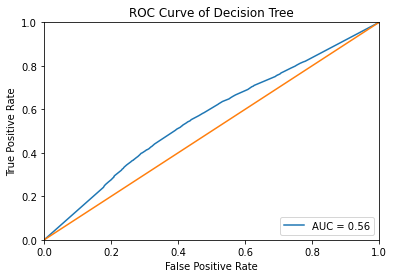

In [37]:
# plot Roc curve
y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

In [38]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 69.50
|   |--- feature_2 <= -95013.47
|   |   |--- feature_2 <= -218211.16
|   |   |   |--- feature_2 <= -1120004.50
|   |   |   |   |--- feature_2 <= -7299226.25
|   |   |   |   |   |--- feature_2 <= -11791058.00
|   |   |   |   |   |   |--- feature_2 <= -27487897.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -27487897.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -11791058.00
|   |   |   |   |   |   |--- feature_2 <= -9545142.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -9545142.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -7299226.25
|   |   |   |   |   |--- feature_1 <= 45.50
|   |   |   |   |   |   |--- feature_2 <= -2018357.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -2018357.94
|   |   |   |   |   |   |   |--- feature_1 <= 43.50
|   |   |   |   |   |   |   |   |--- fe

In [39]:
# Build Random Forest model and check results
rfc = RandomForestClassifier().fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59     11609
           1       0.56      0.47      0.51     11318

    accuracy                           0.56     22927
   macro avg       0.56      0.55      0.55     22927
weighted avg       0.56      0.56      0.55     22927



In [40]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [41]:
# Use cross validation score
features = np.arange(1,3,1)
estimators = np.arange(10,40,10)

for f in features:
    for e in estimators:
        scores = cross_val_score(RandomForestClassifier(max_features=f, n_estimators=e), X_train, y_train)
        print('Max features:', f, 'N_estimators:', e, ':', round(scores.mean(), 2))

Max features: 1 N_estimators: 10 : 0.5523488479538858
Max features: 1 N_estimators: 20 : 0.5542098149511098
Max features: 1 N_estimators: 30 : 0.553104898596709
Max features: 2 N_estimators: 10 : 0.5537155422823855
Max features: 2 N_estimators: 20 : 0.5533084207714681
Max features: 2 N_estimators: 30 : 0.5536282843670266


In [42]:
# Take ROC/AUC score
print('Random Forest Roc/Auc:', roc_auc_score(y, rfc.predict_proba(X)[:, 1]))

Random Forest Roc/Auc: 0.7892741865879508


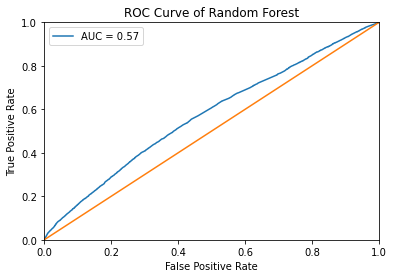

In [43]:
# plot Roc curve
y_scores = rfc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

In [44]:
# Build Knn model
knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54     11609
           1       0.52      0.50      0.51     11318

    accuracy                           0.53     22927
   macro avg       0.52      0.52      0.52     22927
weighted avg       0.52      0.53      0.52     22927



In [45]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [46]:
# Use cross validation score
algos = ['ball_tree', 'kd_tree', 'brute']
neighbors = np.arange(2, 6, 2)

for a in algos:
    for n in neighbors:
        scores = cross_val_score(KNeighborsClassifier(algorithm=a, n_neighbors=n), X_train, y_train)
        print('Algorithms:', a, 'N_neighbors:', n, ':', round(scores.mean(), 2))

Algorithms: ball_tree N_neighbors: 2 : 0.5282572284111653
Algorithms: ball_tree N_neighbors: 4 : 0.5293476373655238
Algorithms: kd_tree N_neighbors: 2 : 0.5283299239621977
Algorithms: kd_tree N_neighbors: 4 : 0.5293476341945074
Algorithms: brute N_neighbors: 2 : 0.5259600268014306
Algorithms: brute N_neighbors: 4 : 0.5295365210715625


In [47]:
# Take ROC/AUC score
print('Knn Roc/Auc:', roc_auc_score(y, knn.predict_proba(X)[:, 1]))

Knn Roc/Auc: 0.6360973967668219


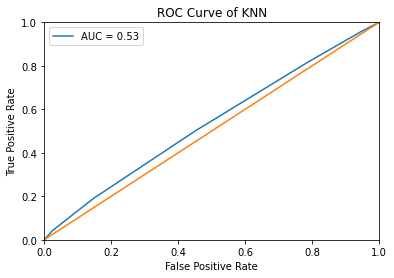

In [48]:
# plot Roc curve
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

## 5. Analyzing and Comparing 

In this project to predict customer gender we required to use some classifier models. Then to use hyperparameter tuning to determine best parameters for each model. I used Grid Search for Decision Tree and Cross Validation for Random Forest and KNN.  

In [49]:
# create new dataframe to store all results
d = {'Best Accuracy' : [57, 56, 53], 'Recall': [66, 63, 52], 'Precision': [55, 55, 53], 'Parameter 1': ['Max depth: 10', 'Max features: 2', 'Algorithm: ball_tree'], 'Parameter 2': ['Max features: 3', 'N estimators: 30', 'N neighbors: 4'], 'ROC/AUC': [0.79,0.79,0.64]}

In [50]:
data = pd.DataFrame(data=d, index=['Decision Tree', 'Random Forest', 'KNN'])

In [51]:
data

,Best Accuracy,Recall,Precision,Parameter 1,Parameter 2,ROC/AUC
Decision Tree,57,66,55,Max depth: 10,Max features: 3,0.79
Random Forest,56,63,55,Max features: 2,N estimators: 30,0.79
KNN,53,52,53,Algorithm: ball_tree,N neighbors: 4,0.64


According to results Decision Tree is the best classification model with 57% accuracy and 79% of ROC/AUC. And we shouldn't use KNN for this task according to its resu 

## 6. Conclusion

In this project we did exploration of given datasets then some descriptive statistics. After that we made some vizualizations.
And started feature engineering where we encoded 'code_description' and 'type_description' to use in supervised learning.
Here we take a lot of results. Learned how to make supervised learning. I think we can be better and next time we will do our best, but now we have not good results